# Contenu

- [Contenu](attachment:./#Contenu)
- [Chargement des données](attachment:./#Chargement-des-données)
  * [Description des données](attachment:./#Description-des-données)
  * [Chargement](attachment:./#Chargement)
- [Affectation de type correctes au données](attachment:./#Affectation-de-type-correctes-au-données)
- [Génération des données manquantes](attachment:./#Génération-des-données-manquantes)
- [Génération des types de données manquantes](attachment:./#Génération-des-types-de-données-manquantes)
- [Construction des réseaux de neurones](attachment:./#Construction-des-réseaux-de-neurones)
- [Comparaison des techniques d'imputation](attachment:./#Comparaison-des-techniques-d'imputation)
  * [Imputation des données avec le réseau de neurone](attachment:./#Imputation-des-données-avec-le-réseau-de-neurone)
  * [Imputation avec le mode](attachment:./#Imputation-avec-le-mode)
  * [Imputation avec le KNN](attachment:./#Imputation-avec-le-KNN)
  * [Comparaison](attachment:./#Comparaison)

# Description et chargement des données
## Description des données
Cet ensemble de données est un sous-ensemble de l'enquête nationale de 1987 sur la prévalence de la contraception en Indonésie.  Les échantillons sont des femmes mariées qui n'étaient pas enceintes ou qui ne savent pas si elles l'étaient au moment de l'interview. Le problème est de prédire le choix de la méthode contraceptive actuelle (pas d'utilisation, méthodes à long terme ou méthodes à court terme) d'une femme  sur la base de ses caractéristiques démographiques et socio-économiques.

Il est constitué de 1473 enrégistrement et contient les colonnes suivantes:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  (1=No-use, 2=Long-term, 3=Short-term)

## Chargement des données

In [1]:
cols_names = ["Wife's age",
              "Wife's education",
              "Husband's education",
              "Number of children ever born",
              "Wife's religion",
              "Wife's now working?",
              "Husband's occupation",
              "Standard-of-living index",
              "Media exposure",
              "Contraceptive method used"]

In [40]:
import pandas as pd

data_cmc: pd.DataFrame = pd.read_csv('cmc.csv', header=None, names=cols_names)
data_cmc.head()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


# Affectation de type correctes au données

Pour avoir un programme plus efficaces on vas convertir en type `category` les variables marqué comme catégorique

In [41]:
data_cmc.dtypes

La prédiction des réseaux de neurone commencent à **0** on vas mettre nos donné sur une échelle de **0 à n-1**  plutôt que **1 à n**

In [42]:
cols_to_scale = ["Wife's education",
                 "Husband's education",
                 "Husband's occupation",
                 "Standard-of-living index",
                 "Contraceptive method used"]
data_cmc[cols_to_scale] = data_cmc[cols_to_scale].apply(lambda x: x - 1)

In [43]:
print("Vérification des ranges des données")
for col in cols_to_scale:
    print(f'{col}: {data_cmc[col].unique()}')

Vérification des ranges des données
Wife's education: [1 0 2 3]
Husband's education: [2 1 3 0]
Husband's occupation: [1 2 0 3]
Standard-of-living index: [2 3 1 0]
Contraceptive method used: [0 1 2]


In [44]:
categorical_data = ["Wife's education", "Wife's religion", "Wife's now working?", "Media exposure",
                    "Husband's education", "Husband's occupation", "Standard-of-living index",
                    "Contraceptive method used"]
for column in categorical_data:
    data_cmc[column] = data_cmc[column].astype('category')
print("Vérification des types des données")
data_cmc.dtypes

Vérification des types des données


# Génération des données manquantes
Notre Datasets ne contient aucune donées manquantes. Toutefois dans le cadre de notre expérience, nous allons générer des données manquantes de tous types

In [45]:
print("Vérification du nombre de donnée manquante")
data_cmc.isna().sum()

Vérification du nombre de donnée manquante


# Génération des types de données manquantes

In [46]:
from utils import NaProducter


def generate_missing(init_data, p_miss, seed_value=2022, mecha="MCAR", p_obs=0.6):
    generator = NaProducter(seed_value=seed_value)
    data_with_missing = generator.produce_NA(init_data, p_miss, mecha=mecha, p_obs=p_obs)
    return pd.DataFrame(data_with_missing['X_incomp'].numpy(), columns=cols_names)


data_with_missing_inc = generate_missing(data_cmc.values, 0.006)
data_with_missing_inc.isna().sum()

Vu que notre étude cherche à prédire les valeurs manquantes discrètes finis, nous allons décanter les colonnes avec des valeurs manquantes inifinis qui peuvent en effet être considéré comme continue.

In [47]:
integer_columns = ["Wife's age", "Number of children ever born"]
for column in integer_columns:
    data_with_missing_inc[column] = data_cmc[column]
data_with_missing_inc.isna().sum()

# Construction de l'imputeur
## Description des fonctions

- `missing_type_detector(row) -> tuple`: Cette fonction prend une ligne donnée puis retourne un tuple contenant les indices des colonnes de la ligne ou les valeurs sont manquantes
  
- `missing_type_init(self)`: Cette méthode calcule tout les types manquants de la donnée entré. Elle se sert de la méthode précédente
  
- `model_init(num_features: int, num_classes: int) -> Sequential`: Crée un perceptron multicouche avec `num_features` neurone sur la première couche et `num_classes` sur la dernière couche

- `fit_missing_type(self, missing_type: tuple) -> dict` : Retourne pour un type de donnée manquant un ensemble de réseaux de neurone ayant en sortie l'une des colonnes manquantes

- `fit_all_missing_type(self)` : Pour tout les types manquants entraine un perceptron multicouche puis le sauvegarde dans les modèles de la classes

In [48]:
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np


class IMLPImputer:
    def __init__(self):
        self.models: dict = {}
        self.missing_types: dict = {}
        self.X: pd.DataFrame = pd.DataFrame()

    def transform(self, datasets: pd.DataFrame):
        data_filled: pd.DataFrame = datasets.copy(deep=True)
        for line, row in tqdm(data_filled.iterrows()):
            mtype = self.missing_type_detector(row)
            if mtype:
                model = self.models[mtype]
                pred = self.predict_missing(mtype, line, model)
                for col, value in pred.items():
                    data_filled.iloc[line, col] = value
        return data_filled

    def fit_transform(self, datasets: pd.DataFrame):
        self.fit(datasets)
        return self.transform(datasets)

    def fit_all_missing_type(self):
        for key in tqdm(self.missing_types_permuted):
            self.models[key] = self.fit_missing_type(key)

    def fit(self, datasets: pd.DataFrame):
        self.X = datasets.copy(deep=True)
        self.missing_type_init()
        self.fit_all_missing_type()

    @staticmethod
    def model_init(num_features: int, num_classes: int) -> Sequential:
        model = Sequential([

            # dense layer 1
            Dense(32, input_shape=(num_features,), activation='relu'),

            # dense layer 2
            Dense(32, activation='relu'),

            Dense(32, activation='relu'),

            # output layer
            Dense(num_classes, activation='softmax'),
        ])
        sgd = SGD(momentum=0.9, learning_rate=0.001)
        model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=False,
            reduction="auto",
            name="sparse_categorical_crossentropy",
        ))
        return model

    @property
    def d_comp(self):
        return self.X[~self.X.isna().any(axis=1)]

    @property
    def d_miss(self):
        return self.X[self.X.isna().any(axis=1)]

    @property
    def missing_types_permuted(self):
        return {value: key for key, value in self.missing_types.items()}

    def fit_missing_type(self, missing_type: tuple) -> dict:
        missing_type = list(missing_type)
        model = {}
        X_train, y_train = self.d_comp.drop(self.d_comp.columns[missing_type], axis=1).values, self.d_comp.values[:,
                                                                                               missing_type]
        for i in range(len(missing_type)):
            model[missing_type[i]] = self.model_init(num_features=X_train.shape[
                1], num_classes=len(np.unique(y_train[:,
                                              i])))
            model[missing_type[i]].fit(X_train, y_train[:, i], epochs=1000, batch_size=256, verbose=0)
        return model

    # noinspection PyPep8Naming
    def predict_missing(self, missing_type: tuple, line: int, models: dict):
        missing_type = list(missing_type)
        X_test = self.d_miss.drop(self.d_comp.columns[missing_type], axis=1).loc[line, :].values.reshape(1, -1)
        prediction = {}
        for col, model in models.items():
            prediction[col] = np.argmax(model.predict(X_test, verbose=0), axis=1)
        return {key: value[0] for key, value in prediction.items()}

    @staticmethod
    def missing_type_detector(row) -> tuple:
        return tuple(np.where(np.isnan(row), 1, 0).nonzero()[0])

    def missing_type_init(self):
        for index, rows in self.d_miss.iterrows():
            if (mt := self.missing_type_detector(rows.values)) not in self.missing_types.values():
                self.missing_types[f'mt{index}'] = mt
        

# Comparaison des techniques d'imputation
## Imputation des données avec le réseau de neurone

In [49]:
imlpImputer = IMLPImputer()
filled_with_mlp = imlpImputer.fit_transform(data_with_missing_inc)
filled_with_mlp["Contraceptive method used"] = data_cmc["Contraceptive method used"]
filled_with_mlp.isna().sum()

100%|██████████| 9/9 [01:28<00:00,  9.83s/it]
1473it [00:05, 272.71it/s]


Pour les deux méthodes de comparaisons on vas utiliser les implémentations scikit-learn

## Imputation avec le mode

In [50]:
from sklearn.impute import SimpleImputer

simpleImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
filled_with_mode = pd.DataFrame(simpleImputer.fit_transform(data_with_missing_inc), columns=cols_names)
filled_with_mode["Contraceptive method used"] = data_cmc["Contraceptive method used"]
filled_with_mode.isna().sum()

## Imputation avec le KNN

In [51]:
from sklearn.impute import KNNImputer

knnImputer = KNNImputer()
filled_with_knn = pd.DataFrame(knnImputer.fit_transform(data_with_missing_inc.drop("Contraceptive method used", axis=1)))
filled_with_knn["Contraceptive method used"] = data_cmc["Contraceptive method used"]
filled_with_knn.isna().sum()

## Comparaison

In [52]:
filled_data = {"Deep learning": filled_with_mlp, "Mode": filled_with_mode, "KNN": filled_with_knn}

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

score = {}
for name, data in filled_data.items():
    print(name)
    X, y = data.drop("Contraceptive method used", axis=1).values, data["Contraceptive method used"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=11, stratify=y)
    logreg = LogisticRegression(max_iter=500)
    logreg.fit(X_train, y_train)
    score[name] = logreg.score(X_test, y_test)

Deep learning
Mode
KNN


(0.0, 0.6)

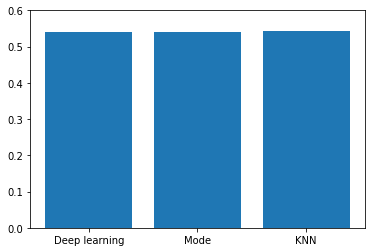

In [54]:
import matplotlib.pyplot as plt

labels = list(score.keys())
val = list(score.values())
plt.bar(x=labels, height=val)
plt.ylim((0, 0.6))

In [55]:
score

{'Deep learning': 0.5389830508474577,
 'Mode': 0.5389830508474577,
 'KNN': 0.5423728813559322}

# Test avec différent type de valeur manquantes

In [61]:
missing_types = {"MAR", "NMAR", "MCAR"}
imputers = {"IMLP": IMLPImputer(), "Simple Imputer": SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
            "KNN": KNNImputer()}
score = {}
for missing_type in missing_types:
    print(missing_type)
    data_with_missing_inc = generate_missing(data_cmc.values, 0.006, mecha=missing_type)
    integer_columns = ["Wife's age", "Number of children ever born"]
    for column in integer_columns:
        data_with_missing_inc[column] = data_cmc[column]
    score_by_imputer = {}
    for imputer in imputers:
        filled_data = pd.DataFrame(imputers[imputer].fit_transform(data_with_missing_inc), columns=cols_names)
        filled_data["Contraceptive method used"] = data_cmc["Contraceptive method used"]
        X, y = filled_data.drop("Contraceptive method used", axis=1).values, filled_data[
            "Contraceptive method used"].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                            random_state=11, stratify=y)
        logreg = LogisticRegression(max_iter=500)
        logreg.fit(X_train, y_train)
        score_by_imputer[imputer] = logreg.score(X_test, y_test)
    score[missing_type] = score_by_imputer

MAR
NMAR
MCAR


100%|██████████| 4/4 [00:40<00:00, 10.08s/it]
1473it [00:02, 633.80it/s]
100%|██████████| 9/9 [01:33<00:00, 10.38s/it]
1473it [00:05, 277.42it/s]
100%|██████████| 9/9 [01:31<00:00, 10.15s/it]
1473it [00:04, 309.80it/s]


In [101]:
score = pd.DataFrame(score).T
score

,IMLP,Simple Imputer,KNN
MAR,0.542373,0.542373,0.545763
NMAR,0.538983,0.538983,0.538983
MCAR,0.535593,0.538983,0.538983


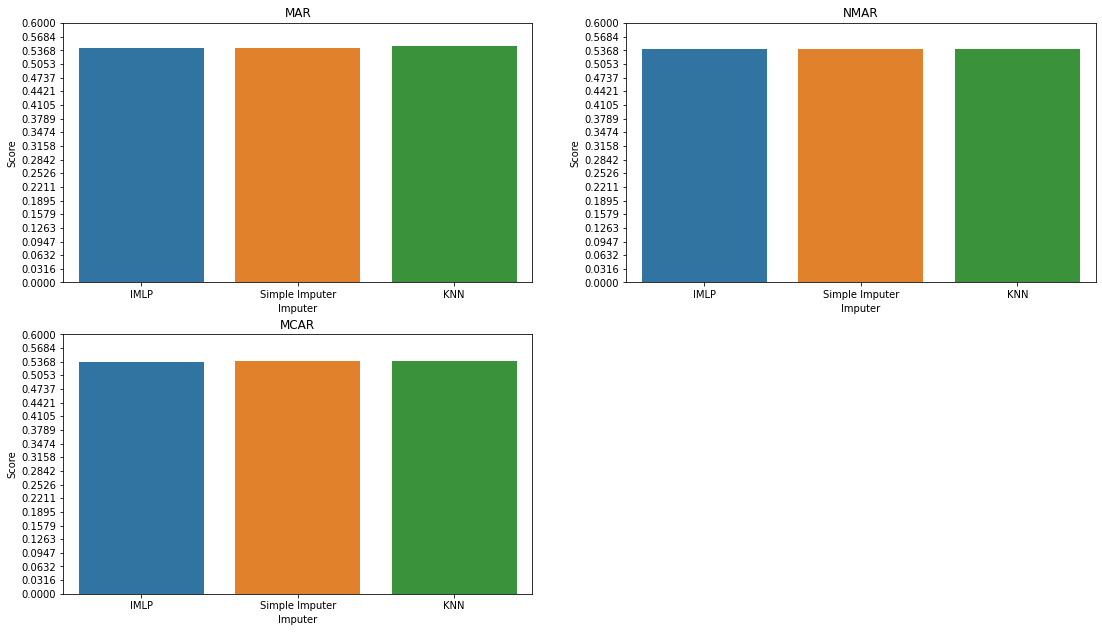

In [102]:
import seaborn as sns
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5, forward=True)
for i, missing_type in enumerate(missing_types):
    row = score.loc[missing_type]
    sns.barplot(x="Imputer", y="Score", data=pd.DataFrame({"Imputer": list(row.index),
                                                           "Score": list(row.values)}), ax=ax[i//2, i%2])
    
    ax[i//2, i%2].set_title(missing_type)
    ax[i//2, i%2].set_yticks(list(np.linspace(0, 0.6, 20)))

ax[1, 1].set_axis_off()